# r/conspiracy Texts and Topics

This notebook loads the dataframe created in the previous notebook and explores possible topics. It is also set up to begin exploring the genre of the posts. Work yet to be done.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
# Let's build our texts: we will get the posts into a list
# And then get our comments into a list

In [3]:
df = pd.read_csv('c2.csv', index_col='id')
posts = df.body.tolist()
len(posts)

100

In [4]:
df2 = pd.read_csv('c2comments.csv')
comment_list = df2.lists.tolist()

# It appears that pandas lost the fact that we saved a list of lists.
# This loses our text shapes
type(comment_list[0])

str

In [5]:
# Let's see what it look like:
comment_list[1][0:1000]

'[\'😂 I dont believe shit until it happens, and even then I’m still suspicious.\', \'“Blow me”\\n\\n-\\tMostly everyone\', \'Hard pass thanks\', \'Just in time for 2024 elections. How convenient.\', "Ya\'ll really can\'t have an election without covid, huh?", \'Oh FFS.\', \'SS: So since the last pandemic, we…\\n\\n* Continued funding Gain of Function research\\n* Refuse to hold China, the Wuhan lab, or any govt official anywhere accountable\\n* Are in talks with WHO to give them unlimited power to declare lockdowns in any country\\n* Covered up fraud by Big Pharma companies\\n\\nNow just ahead of the 2024 election cycle- surprise!!! A new, super infectious variant. Who coulda seen this coming?\\n\\nhttps://twitter.com/kylenabecker/status/1661732575088611330?s=46&t=T37mFTn9E_HUaxN1rB76Hw\', \'Oh FFS!\\nCan they just stop with the BS already\', \'This is why i hate twitter.  Full of scare attempts for clicks\', "I\'m done with Covid and vaccines...I\'d rather just die.", \'So has air tra

In [6]:
comments = comment_list[1].split("\'")

for comment in comments[0:10]:
    print(comment)

[
😂 I dont believe shit until it happens, and even then I’m still suspicious.
, 
“Blow me”\n\n-\tMostly everyone
, 
Hard pass thanks
, 
Just in time for 2024 elections. How convenient.
, "Ya
ll really can


In [7]:
raw = [*posts, *comment_list]
len(raw)

200

In [8]:
texts = [x for x in raw if str(x) != 'nan']
len(texts)

148

## Topic Modeling

In [9]:
# Display Functions
# =-=-=-=-=-=-=-=-=-=-= 

def topic_details(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "{:d}: ".format(topic_idx)
        message += " ".join([feature_names[i] + ' ' + str(round(topic[i], 2)) + ','
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

def just_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        words = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        topics.append(words)
    return topics

In [10]:
# SETTINGS
n_topics = 20
n_features = 5000
n_top_words = 10
n_top_documents = 5

In [11]:
# NMF is able to use tf-idf
vectorizer = TfidfVectorizer(max_df = 0.9, 
                             min_df = 2, 
                             max_features = n_features,
                             stop_words = 'english',
                                  )
X = vectorizer.fit_transform(texts)
features = vectorizer.get_feature_names_out()
features.shape

(5000,)

In [12]:
# the NMF topic model
model = NMF(n_components=n_topics, 
            init='random',
            random_state=0, 
)
W = model.fit_transform(X)
H = model.components_

/Users/jl/miniconda3/envs/DEV/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [13]:
topic_details(model, features, n_top_words)

0: people 1.03, don 0.66, just 0.51, like 0.48, think 0.37, good 0.33, want 0.31, world 0.27, ni 0.26, country 0.26,
1: bush 0.62, kennedy 0.51, twin 0.42, towers 0.41, cia 0.39, conspiracy 0.39, stream 0.36, biden 0.34, lied 0.31, titanic 0.3,
2: injection 1.0, weight 0.8, way 0.59, loss 0.58, want 0.39, eat 0.38, lose 0.37, week 0.36, lets 0.35, diabetic 0.34,
3: witches 1.09, witchcraft 0.85, witch 0.83, women 0.67, practicing 0.66, spells 0.62, harm 0.4, practical 0.39, today 0.39, bitty 0.39,
4: pyramid 3.03, webp 2.18, width 2.05, preview 2.05, enabled 2.05, pjpg 1.97, redd 1.97, format 1.95, auto 1.84, jpg 1.73,
5: meds 2.29, medicines 1.69, counter 1.64, medications 1.6, pain 1.6, allergy 1.28, medicine 1.24, antibiotics 1.13, buy 1.13, utter 1.03,
6: sword 2.9, london 1.4, following 1.28, god 1.2, blade 1.06, manufactured 0.92, german 0.9, introduced 0.88, gold 0.83, calling 0.83,
7: paxton 2.16, ken 2.05, abuse 1.62, 24 1.27, power 1.26, 05 1.22, 2023 1.03, fraud 0.92, invest

In [14]:
topics = just_words(model, features, 10)
for topic in topics:
    print(topic)

people don just like think good want world ni country
bush kennedy twin towers cia conspiracy stream biden lied titanic
injection weight way loss want eat lose week lets diabetic
witches witchcraft witch women practicing spells harm practical today bitty
pyramid webp width preview enabled pjpg redd format auto jpg
meds medicines counter medications pain allergy medicine antibiotics buy utter
sword london following god blade manufactured german introduced gold calling
paxton ken abuse 24 power 05 2023 fraud investigation texas
vaccine vaccines sids people covid autism measles think vaccination data
chris epstein trafficking island chester bodyguard documentary child celebrities connect
rock black company stock media holds world blackrock round hear
landline simulation phone landlines phones technology matrix progression cell way
twitter status com 19 source https terrorist nhttps uk cia
com https www youtube pentagon share html reuters watch videos
frogs toads like bugs noticed time jus

In [15]:
# with open('topics.txt', mode='w') as myfile:
#     myfile.write('\n'.join(topics))

## What Reddit `r/Conspiracy` Posts Look Like

In [16]:
nonan = [x for x in posts if str(x) != 'nan']

In [17]:
for item in nonan[0:10]:
    print(item[0:10])

The conspi
I think it
The length
Interestin
Source: ht
It's not j
Recently, 
> "However
Anyone not
I made a p


In [18]:
# ops = original posts
ops = [word_tokenize(s) for s in nonan]

In [19]:
lengths = [len(i) for i in ops]

<BarContainer object of 48 artists>

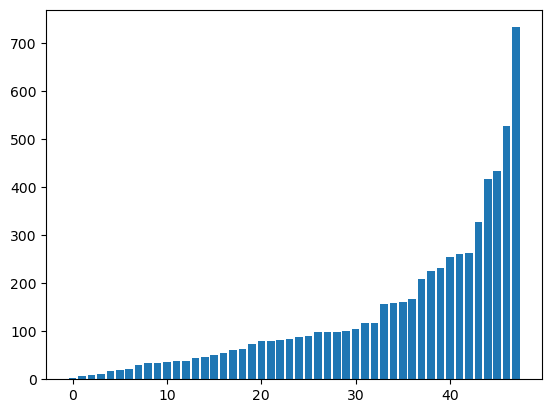

In [20]:
plt.bar(range(0,len(ops)), sorted(lengths), width=0.8)

In [21]:
average = sum(lengths)/len(lengths)
average                           

134.5

In [22]:
model_texts = []
len_win = 25 # Length window
for text in ops:
    if average-len_win < len(text) < average+len_win:
        model_texts.append(text)
print(len(model_texts))

4


In [23]:
models = [' '.join(text) for text in model_texts]
for text in models:
    print(text)

Recently , i ’ ve been doing my due diligence on the Kennedy conspiracy . I ’ m not a conspiracy theorist , but after looking into the death of MLK , I thought I should look into the JFK conspiracy . I know the basics , such as the Magic Bullet , the motorcycles audio recording , etc , but I am somewhat confused . I ’ ve heard of the CIA hiding tapes and covering up evidence surrounding the conspiracy , which would solidify it as true for me , but i ’ ve yet to actually find anything actually proving that . Could somebody give me an example of the CIA doing this ?
this vid goes into the painting on the `` egypt station '' album . load the vid up on youtube but do n't play it , to see the painting . note the `` tree '' which looks like a yagi antennae with an array of lines at the top - this looks very much like an electroculture antenna design . https : //www.youtube.com/watch ? v=4l-Uxq_-tdw i 'd also note that the book , `` memoirs of billy shears '' , which has driven a lot of this 

In [24]:
# with open('models.txt', mode='w') as myfile:
#     myfile.writelines('\n'.join(models))